In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix,precision_score,classification_report,f1_score,roc_curve,roc_auc_score,auc,accuracy_score,recall_score
from sklearn import metrics
%matplotlib inline

In [48]:
df = pd.read_csv("Loan_Modelling.csv")

In [49]:
df['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [50]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [52]:
df.shape

(5000, 14)

In [71]:
pd.set_option('display.max_columns', None)

df.describe()


,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.140400,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.405644,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [72]:
df.drop('ID',inplace=True,axis=1)

KeyError: "['ID'] not found in axis"

* Information of the attributes
  The attributes can be divided accordingly :

The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.
The binary category have five variables as below:

* Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
* Securities Account - Does the customer have a securities account with the bank?
* CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
* Online - Does the customer use internet banking facilities?
* Credit Card - Does the customer use a credit card issued by UniversalBank?

Interval variables are as below:

* Age - Age of the customer
* Experience - Years of experience
* Income - Annual income in dollars
* CCAvg - Average credit card spending
* Mortage - Value of House Mortgage

Ordinal Categorical Variables are:

* Family - Family size of the customer
* Education - education level of the customer

The nominal variable is :

* ID
* Zip Code


In [73]:
# No columns have null data in the file
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [74]:
#finding unique data
df.apply(lambda x: len(x.unique()))

Age                    45
Experience             44
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64

* Dataset has no missing values
* As we have observed from the 5 point summary of the data Experience column has negative values which has no meaning.

###  Data Cleaning

#### Handling missing values / unknown / negative values in data

In [75]:
# There are 52 records with negative experience. Before proceeding any further we need to clean the same
df[df['Experience'] < 0]['Experience'].count()


0

In [76]:
# Cheching the correlation of Experience with other variables.

df.corr()['Experience']

Age                   0.993922
Experience            1.000000
Income               -0.047024
ZIPCode              -0.030668
Family               -0.051627
CCAvg                -0.049865
Education             0.014003
Mortgage             -0.011104
Personal_Loan        -0.008477
Securities_Account   -0.001049
CD_Account            0.009614
Online                0.013944
CreditCard            0.008915
Name: Experience, dtype: float64

Experience has positive corelation with Age.

* We can replace negative 'Experience' values with the median of total remaining 'Experience' values but it will be not appropriate. So, we will derive various medians of Experience data on the basis of group of respective Age of Customers.
* Steps Taken to derive median of Experiences on the basis of Age groups -: 
    1. Creating a group of 'Age' values where  negative values in 'Experience' exists.
    2. Creating a list of indexes of negative values in 'Experience'.
    3. Replace negative 'Experience' values with the 'Experience' meadian.


In [77]:
# Creating a list of ages.
ages = df[df['Experience'] < 0]['Age'].unique().tolist()

# Creating a list of indexes.
indexes = df[df['Experience'] < 0].index.tolist()

# Replacing Negative Value with median.
for i in indexes:
    for x in ages:
        df.loc[i,'Experience'] = df[(df.Age == x) & (df.Experience > 0)].Experience.median()
        

In [78]:
# checking if there are records with negative experience
df[df['Experience'] < 0]['Experience'].count()

0

In [79]:
df.isna().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

#### Detecting Outliers


In [80]:
# Outlier is defined as Data points above or below than 1.5 times the Inter Quartile Range of the data.
numerical = ['Age','Income','Experience','CCAvg','Mortgage']
Q1 = df[numerical].quantile(0.25)
Q3 = df[numerical].quantile(0.75)
IQR = Q3 - Q1
out = (df[numerical] < (Q1 - 1.5 * IQR)) | (df[numerical] > (Q3 + 1.5 * IQR))
out.sum()

Age             0
Income         96
Experience      0
CCAvg         324
Mortgage      291
dtype: int64

<AxesSubplot:xlabel='Income'>

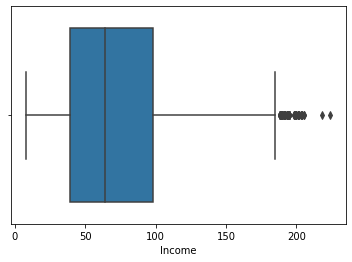

In [81]:
sns.boxplot(x=df['Income'])

<AxesSubplot:xlabel='CCAvg'>

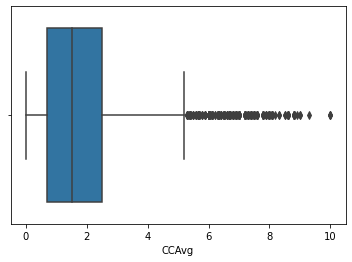

In [82]:
sns.boxplot(x=df['CCAvg'])

<AxesSubplot:xlabel='Mortgage'>

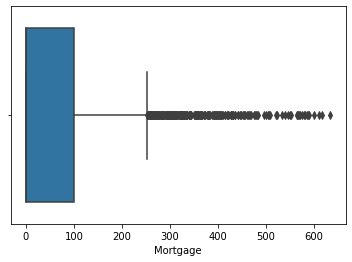

In [83]:
sns.boxplot(x=df['Mortgage'])

Age,CCAvg and Mortgate contains many outliers.

##   Distribution of Numerical Features

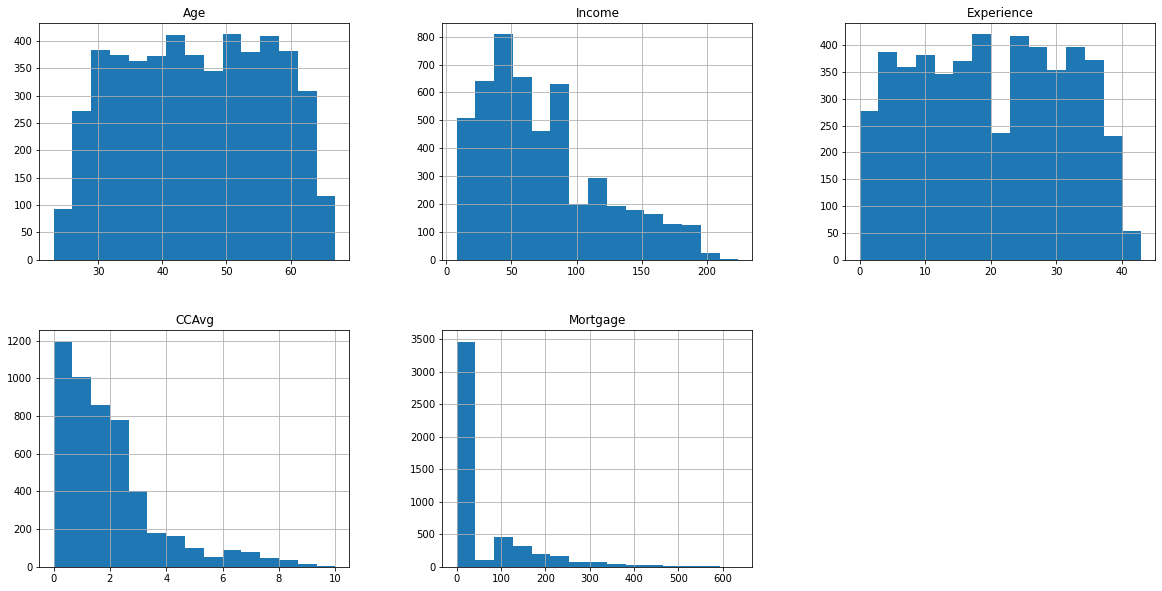

In [84]:
df[numerical].hist(bins=15, figsize=(20, 10), layout=(2, 3));

* Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm     this by looking at the describe statement above, which shows mean is almost equal to median
* Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to         median. There are negative values in the Experience. This could be a data input error as in general it is not possible to       measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.
* Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean   is greater than the median
* CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
* Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K



### Distribution of categorical features and their relation with the target feature

/home/ubuntu/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


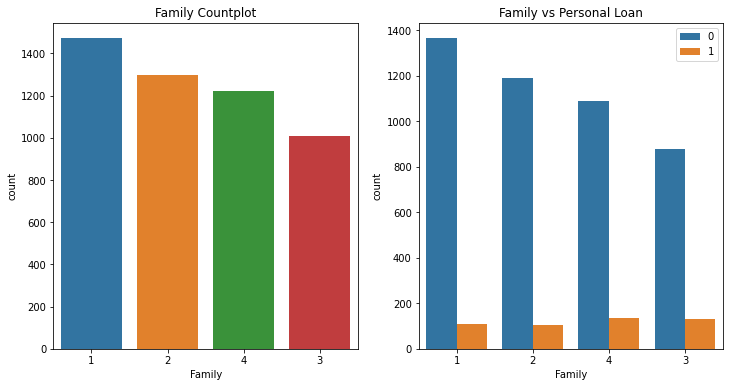

In [85]:
# Using sns.countplot() for visualizing the counts

fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['Family'],hue=df['Personal_Loan'],ax=axes[1],order = df["Family"].value_counts().index)
plt.legend()
ax.set_title('Family vs Personal Loan')
ax = sns.countplot(df['Family'],ax=axes[0],order = df["Family"].value_counts().index)
plt.legend()
ax.set_title('Family Countplot')
plt.show()

 * Majority of the customers have family size 1.
 * More number of family size have accepted the loan

/home/ubuntu/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


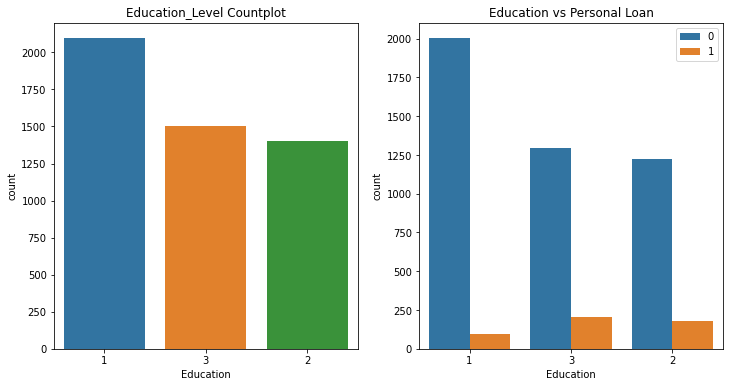

In [86]:
# Using sns.countplot() for visualizing the counts

fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['Education'],hue=df['Personal_Loan'],ax=axes[1],order = df["Education"].value_counts().index)
plt.legend()
ax.set_title('Education vs Personal Loan')
ax = sns.countplot(df['Education'],ax=axes[0],order = df["Education"].value_counts().index)
plt.legend()
ax.set_title('Education_Level Countplot')
plt.show()

More than 2000 customres has Undergraduate and very less to accept for loan
Customers who are Graduate and Professional are more likely to accept loan than undergraduate.

/home/ubuntu/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


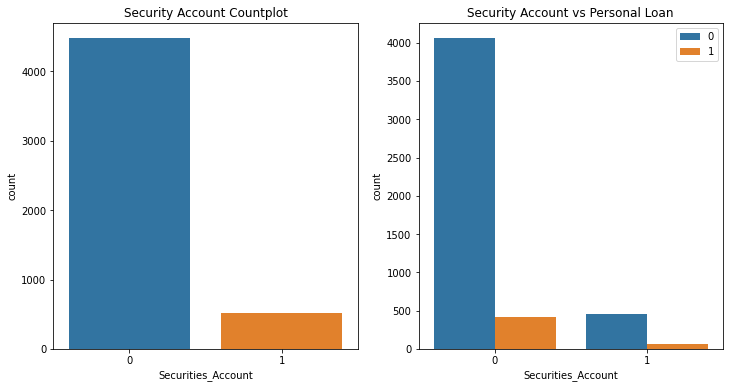

In [87]:
# Using sns.countplot() for visualizing the counts

fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['Securities_Account'],hue=df['Personal_Loan'],ax=axes[1])
plt.legend()
ax.set_title('Security Account vs Personal Loan')
ax = sns.countplot(df['Securities_Account'],ax=axes[0])
plt.legend()
ax.set_title('Security Account Countplot')
plt.show()

More than 4000 customers do not have Securities Account

KeyError: 'CD Account'

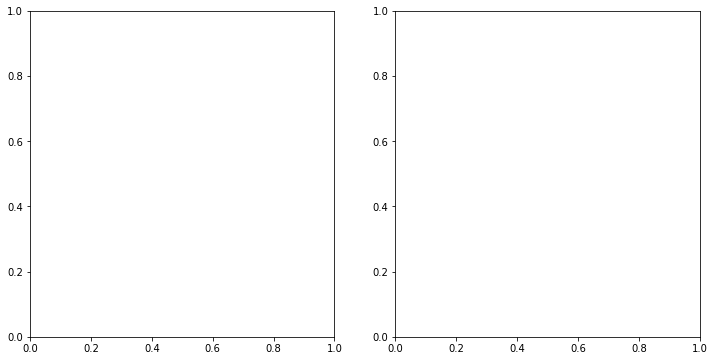

In [88]:
# Using sns.countplot() for visualizing the counts

fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['CD Account'],hue=df['Personal Loan'],ax=axes[1])
plt.legend()
ax.set_title('CD Account vs Personal Loan')
ax = sns.countplot(df['CD Account'],ax=axes[0])
plt.legend()
ax.set_title('Countplot for Certificate of Deposit Account ')
plt.show()

Most of the customer do not have CD Account.
Almost al customers who has CD Account has accepted the loan 

/home/ubuntu/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


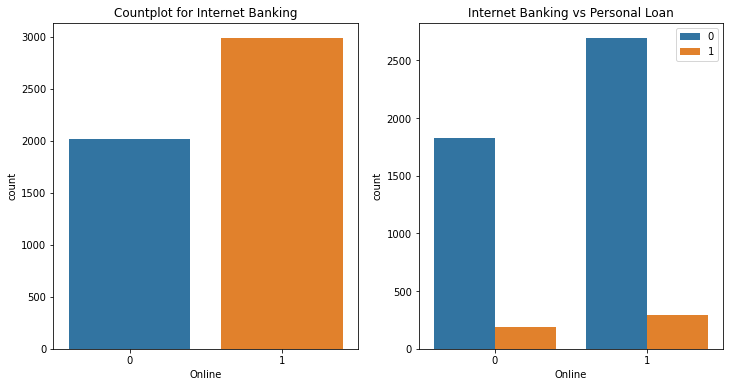

In [90]:
# Using sns.countplot() for visualizing the counts

fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['Online'],hue=df['Personal_Loan'],ax=axes[1])
plt.legend()
ax.set_title('Internet Banking vs Personal Loan')
ax = sns.countplot(df['Online'],ax=axes[0])
plt.legend()
ax.set_title('Countplot for Internet Banking')
plt.show()

Most of the customers uses Online Banking

/home/ubuntu/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ubuntu/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


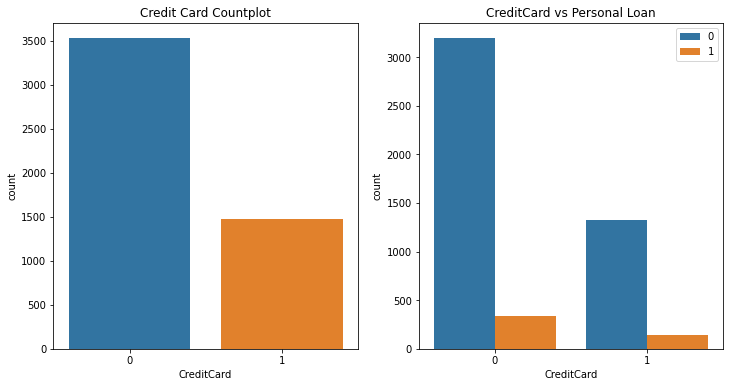

In [92]:
# Using sns.countplot() for visualizing the counts

fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(12,6) )
ax = sns.countplot(df['CreditCard'],hue=df['Personal_Loan'],ax=axes[1])
plt.legend()
ax.set_title('CreditCard vs Personal Loan')
ax = sns.countplot(df['CreditCard'],ax=axes[0])
plt.legend()
ax.set_title('Credit Card Countplot')
plt.show()

Most of the customer do not use credit card offered by the bank.


#### Relationship of some numerical features with target feature

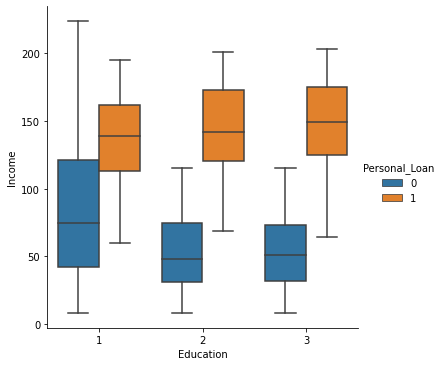

In [94]:
sns.catplot(x='Education', y = 'Income', data = df,kind= 'box',hue='Personal_Loan')

* From the above plot we can infer that customer having annual income in the range of (120 and 170)$ has accepted the loan.
* It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

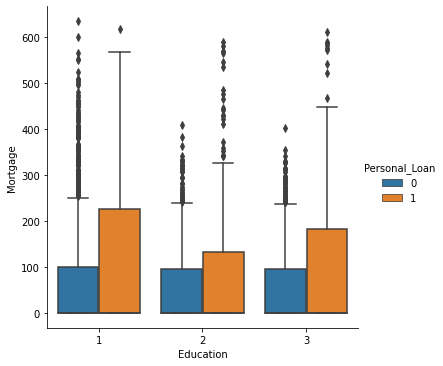

In [95]:
sns.catplot(x='Education',y='Mortgage',data=df,hue='Personal_Loan',kind='box')

From the above chart it seems that customer who has personal loan have high mortgage

#### Distribution of the target column

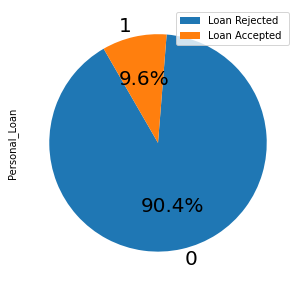

In [96]:
fig,ax = plt.subplots( figsize=(7,5) )
df['Personal_Loan'].value_counts(sort=False).plot(kind='pie',autopct='%1.1f%%', fontsize= 20,startangle=120)
plt.legend(['Loan Rejected','Loan Accepted '])
plt.show()

* The dataset is biased
* The percentage of customers who has accepted the loan is very less

##### Corelation amaong the attributes

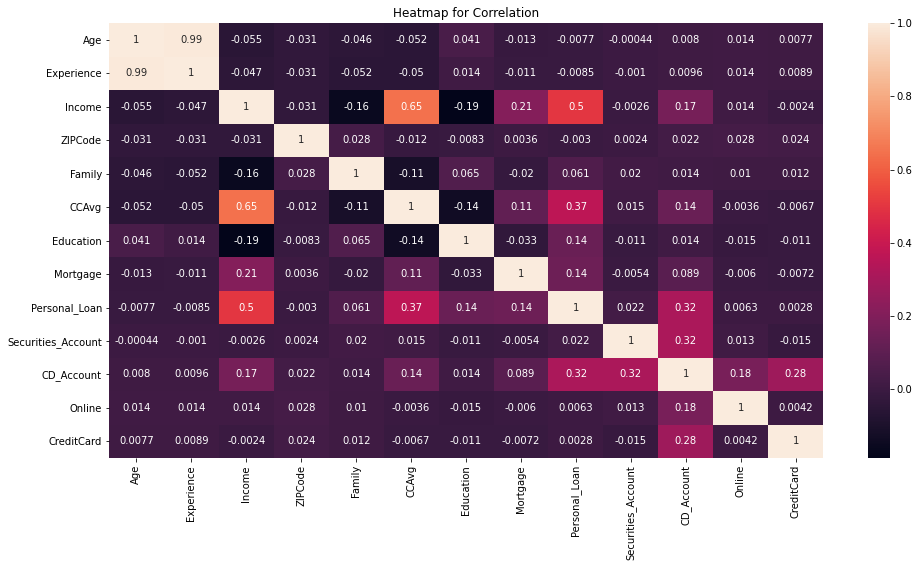

In [97]:
# Plot for Visualising the correlation between variables and Target Column.

fig,ax = plt.subplots( figsize=(16,8) )
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap for Correlation')
plt.show()

* Income , CD Account and CCAvg column  are slightly corelated with the Target column
* Others columns such as Income and CCavg are positively corelated.
* Experirnce and Age are highly corelated

### Separating the target column

In [98]:
# Creating seperate DataSets for Target column('Personal Loan') named as 'y' and rest of the features in 'X' 

y = df["Personal_Loan"]
X = df.drop("Personal_Loan",axis=1)

In [99]:
X.drop('ID',axis=1,inplace=True)

KeyError: "['ID'] not found in axis"

In [101]:
X.drop('ZIP_Code',axis=1,inplace=True)

KeyError: "['ZIP_Code'] not found in axis"

### Splitting the data

In [102]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Scaling the features

In [103]:
sc = StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled= sc.transform(X_test)

### Creating different ML Classification models

#### Logistic Regression

In [104]:
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
lr_pred = lr.predict(X_test_scaled)
lr_accu_test = lr.score(X_test_scaled,y_test)
lr_accu_train = lr.score(X_train_scaled,y_train)
lr_f1 = f1_score(y_test,lr_pred)
print("Training Accuracy :", lr_accu_train)
print("Testing accuracy  :",lr_accu_test)
print("F1 Score :",lr_f1)
print("Logistic Regression Confusion matrix :\n\n", confusion_matrix(y_test,lr_pred))

Training Accuracy : 0.9514285714285714
Testing accuracy  : 0.954
F1 Score : 0.6933333333333334
Logistic Regression Confusion matrix :

 [[1353   19]
 [  50   78]]


#### Naive Bayes

In [105]:
nb = GaussianNB()
nb.fit(X_train_scaled,y_train)
nb_predict = nb.predict(X_test_scaled)
nb_accu_test = nb.score(X_test_scaled,y_test)
nb_accu_train = nb.score(X_train_scaled,y_train)
nb_f1 = f1_score(y_test,nb_predict)
print("Training Accuracy :", nb_accu_train)
print("Testing accuracy  :",nb_accu_test)
print("F1 Score :",nb_f1)
print("Naive Bayes Confusion matrix :\n\n", confusion_matrix(y_test,nb_predict))

Training Accuracy : 0.8828571428571429
Testing accuracy  : 0.8866666666666667
F1 Score : 0.46540880503144655
Naive Bayes Confusion matrix :

 [[1256  116]
 [  54   74]]


#### KNN

Finding the best value for n_neighbors (hyperparameter)

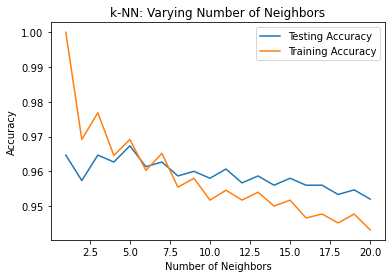

In [38]:
# Plotting a graph between various n_neighbors and accuracy scores.

neighbors = np.arange(1,21)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    train_accuracy[i] = knn.score(X_train_scaled,y_train)
    test_accuracy[i] = knn.score(X_test_scaled, y_test)
    
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [39]:
#testing accuracy is the highest for 'n_neighbors'=3
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled,y_train)
knn_predict = knn.predict(X_test_scaled)
knn_accu_test = knn.score(X_test_scaled,y_test)
knn_accu_train = knn.score(X_train_scaled,y_train)
knn_f1 = f1_score(y_test,knn_predict)
print("Training Accuracy :", knn_accu_train)
print("Testing accuracy  :",knn_accu_test)
print("F1 Score :",knn_f1)
print("KNN Confusion matrix :\n\n", confusion_matrix(y_test,knn_predict))

Training Accuracy : 0.9768571428571429
Testing accuracy  : 0.9646666666666667
F1 Score : 0.7644444444444445
KNN Confusion matrix :

 [[1361   11]
 [  42   86]]


Decision Trees 

In [40]:
# Creating CART model with max_depth = 5

dt = DecisionTreeClassifier(criterion='entropy',max_depth=1)
dt.fit(X_train_scaled,y_train)
dt_pred = dt.predict(X_test_scaled)
dt_training = dt.score(X_train_scaled,y_train)
dt_testing = dt.score(X_test_scaled,y_test)
dt_precision = precision_score(y_test,dt_pred)
dt_f1 = f1_score(y_test,dt_pred)
print("Traing Accuracy :", dt_training)
print("Testing Accuracy :",dt_testing )
print("F1 Score: ",dt_f1 )
print('Decision Tree Confusion matrix :\n\n',confusion_matrix(y_test, dt_pred) )

Traing Accuracy : 0.8994285714285715
Testing Accuracy : 0.9146666666666666
F1 Score:  0.0
Decision Tree Confusion matrix :

 [[1372    0]
 [ 128    0]]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest

In [41]:
rf = RandomForestClassifier(criterion='entropy',max_depth=50,n_estimators=50)
rf.fit(X_train_scaled,y_train)
rf_pred = rf.predict(X_test_scaled)
rf_training = rf.score(X_train_scaled,y_train)
rf_testing = rf.score(X_test_scaled,y_test)
rf_precision = precision_score(y_test,rf_pred)
rf_f1 = f1_score(y_test,rf_pred)
print("Traing Accuracy :", rf_training)
print("Testing Accuracy :",rf_testing )
print("F1 Score: ",rf_f1 )
print('Random Forest Confusion matrix :\n\n',confusion_matrix(y_test, rf_pred) )

Traing Accuracy : 1.0
Testing Accuracy : 0.9853333333333333
F1 Score:  0.9090909090909092
Random Forest Confusion matrix :

 [[1368    4]
 [  18  110]]


In [42]:
print('F1 Score\n :',classification_report(y_test, rf_pred))

F1 Score
 :               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1372
           1       0.96      0.86      0.91       128

    accuracy                           0.99      1500
   macro avg       0.98      0.93      0.95      1500
weighted avg       0.99      0.99      0.98      1500



Bagging Classifier

In [43]:
bg = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=500,bootstrap=True,max_samples=100)
bg.fit(X_train_scaled,y_train)
bg_pred = bg.predict(X_test_scaled)
bg_training = bg.score(X_train_scaled,y_train)
bg_testing = bg.score(X_test_scaled,y_test)
bg_precision = precision_score(y_test,bg_pred)
bg_f1 = f1_score(y_test,bg_pred)
print("Traing Accuracy :", bg_training)
print("Testing Accuracy :",bg_testing )
print("F1 Score: ",bg_f1 )
print('Bagging Classifier Confusion matrix :\n\n',confusion_matrix(y_test, bg_pred) )

Traing Accuracy : 0.9725714285714285
Testing Accuracy : 0.9753333333333334
F1 Score:  0.8340807174887892
Bagging Classifier Confusion matrix :

 [[1370    2]
 [  35   93]]


In [44]:
print('F1 Score\n :',classification_report(y_test, bg_pred))

F1 Score
 :               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1372
           1       0.98      0.73      0.83       128

    accuracy                           0.98      1500
   macro avg       0.98      0.86      0.91      1500
weighted avg       0.98      0.98      0.97      1500



AdaBoost Classifier

In [45]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=10,learning_rate=0.5)
ada.fit(X_train_scaled,y_train)
ada_pred = ada.predict(X_test_scaled)
ada_training = ada.score(X_train_scaled,y_train)
ada_testing = ada.score(X_test_scaled,y_test)
ada_f1 = f1_score(y_test,ada_pred)
ada_precision = precision_score(y_test,ada_pred)
print("Traing Accuracy :", ada_training)
print("Testing Accuracy :",ada_testing )
print("F1 Score: ",ada_f1 )
print('AdaBoost Classifier Confusion matrix :\n\n',confusion_matrix(y_test, ada_pred) )


Traing Accuracy : 0.9857142857142858
Testing Accuracy : 0.982
F1 Score:  0.8870292887029289
AdaBoost Classifier Confusion matrix :

 [[1367    5]
 [  22  106]]


In [46]:
print('F1 Score\n :',classification_report(y_test, ada_pred))

F1 Score
 :               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1372
           1       0.95      0.83      0.89       128

    accuracy                           0.98      1500
   macro avg       0.97      0.91      0.94      1500
weighted avg       0.98      0.98      0.98      1500



GradientBoost Classifier

In [47]:
gbc = GradientBoostingClassifier(learning_rate=0.02,n_estimators=65)
gbc.fit(X_train_scaled,y_train)
gbc_pred = gbc.predict(X_test_scaled)
gbc_training = gbc.score(X_train_scaled,y_train)
gbc_testing = gbc.score(X_test_scaled,y_test)
gbc_f1 = f1_score(y_test,gbc_pred)
gbc_precision = precision_score(y_test,gbc_pred)
print("Traing Accuracy :", gbc_training)
print("Testing Accuracy :",gbc_testing )
print("F1 Score: ",gbc_f1 )
print('AdaBoost Classifier Confusion matrix :\n\n',confusion_matrix(y_test, gbc_pred) )


Traing Accuracy : 0.9814285714285714
Testing Accuracy : 0.9846666666666667
F1 Score:  0.9061224489795918
AdaBoost Classifier Confusion matrix :

 [[1366    6]
 [  17  111]]


In [48]:
print('F1 Score\n :',classification_report(y_test, gbc_pred))

F1 Score
 :               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1372
           1       0.95      0.87      0.91       128

    accuracy                           0.98      1500
   macro avg       0.97      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [49]:
# ROC for Random Forest
rf_prob = rf.predict_proba(X_test_scaled)
fpr,tpr,thresh=roc_curve(y_test,rf_prob[:,1])
auc1 = auc(fpr,tpr)
print("Area under the curve for Random Forest ", auc1)

#ROC for Bagging
bg_prob = bg.predict_proba(X_test_scaled)
fpr1,tpr1,thresh1=roc_curve(y_test,bg_prob[:,1])
auc2 = auc(fpr1,tpr1)
print("Area under the curve for Bagging ", auc2)

#ROC for AdaBoost
ada_prob = ada.predict_proba(X_test_scaled)
fpr2,tpr2,thresh2=roc_curve(y_test,ada_prob[:,1])
auc3 = auc(fpr2,tpr2)
print("Area under the curve for AdaBoost ", auc3)

#ROC for GradientBoost
gbc_prob = gbc.predict_proba(X_test_scaled)
fpr3,tpr3,thresh3=roc_curve(y_test,gbc_prob[:,1])
auc4 = auc(fpr3,tpr3)
print("Area under the curve for  Gradient ", auc4)

lr_prob = lr.predict_proba(X_test_scaled)
lr_fpr,lr_tpr,lr_thresh=roc_curve(y_test,lr_prob[:,1])
lr_auc = auc(lr_fpr,lr_tpr)
print("Area under the curve for  Logistic Regression ", lr_auc)

dt_prob = dt.predict_proba(X_test_scaled)
dt_fpr,dt_tpr,dt_thresh=roc_curve(y_test,dt_prob[:,1])
dt_auc = auc(dt_fpr,dt_tpr)
print("Area under the curve for Decision Trees ", dt_auc)


knn_prob = knn.predict_proba(X_test_scaled)
knn_fpr,knn_tpr,knn_thresh=roc_curve(y_test,knn_prob[:,1])
knn_auc = auc(knn_fpr,knn_tpr)
print("Area under the curve for KNN ", knn_auc)

nb_prob = nb.predict_proba(X_test_scaled)
nb_fpr,nb_tpr,nb_thresh=roc_curve(y_test,nb_prob[:,1])
nb_auc = auc(nb_fpr,nb_tpr)
print("Area under the curve for Naive ", nb_auc)


Area under the curve for Random Forest  0.9980696519679301
Area under the curve for Bagging  0.9943740889212827
Area under the curve for AdaBoost  0.9904536033163265
Area under the curve for  Gradient  0.9964410987609329
Area under the curve for  Logistic Regression  0.9525214103498542
Area under the curve for Decision Trees  0.8567556486880467
Area under the curve for KNN  0.929439800473761
Area under the curve for Naive  0.923167592930029


<Figure size 432x288 with 0 Axes>

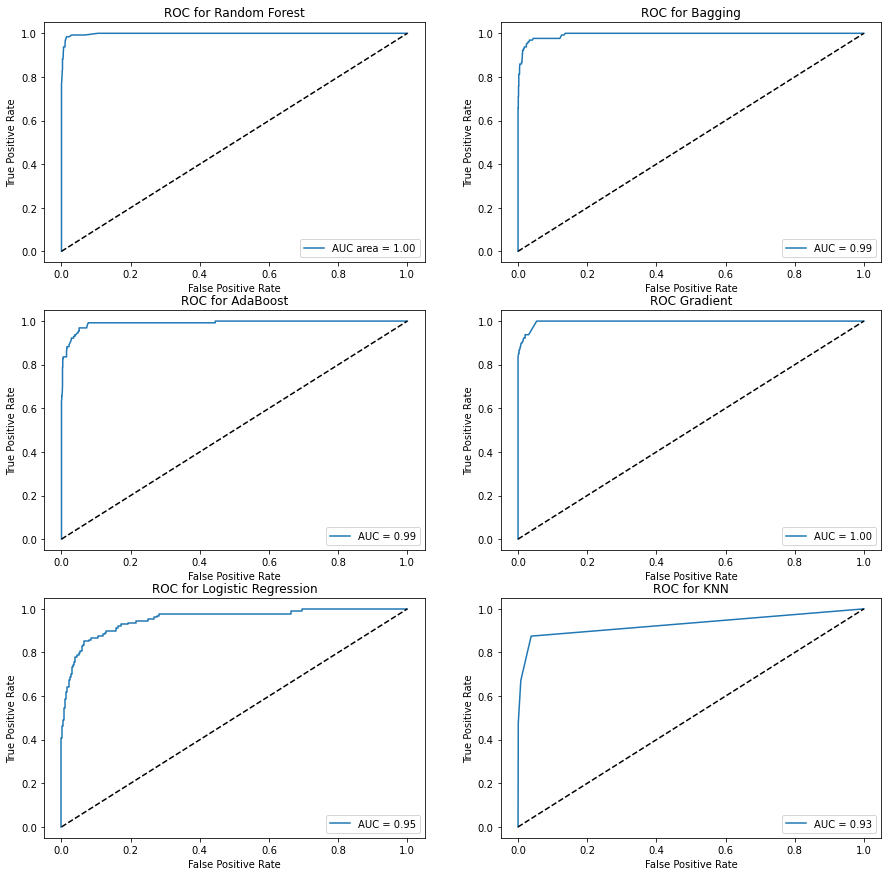

In [50]:
#Plot the ROC curve 
plt.clf()
fig, ax= plt.subplots(nrows = 3, ncols = 2, figsize = (15,15))
ax[0,0].plot(fpr, tpr, label='AUC area = %0.2f' % auc1)
ax[0,0].plot([0, 1], [0, 1], 'k--')
ax[0,0].set_xlabel('False Positive Rate')
ax[0,0].set_ylabel('True Positive Rate')
ax[0,0].set_title('ROC for Random Forest')
ax[0,0].legend(loc="lower right")

ax[0,1].plot(fpr1, tpr1, label='AUC = %0.2f' % auc2)
ax[0,1].plot([0, 1], [0, 1], 'k--')
ax[0,1].set_xlabel('False Positive Rate')
ax[0,1].set_ylabel('True Positive Rate')
ax[0,1].set_title('ROC for Bagging')
ax[0,1].legend(loc="lower right")

ax[1,0].plot(fpr2, tpr2, label='AUC = %0.2f' % auc3)
ax[1,0].plot([0, 1], [0, 1], 'k--')
ax[1,0].set_xlabel('False Positive Rate')
ax[1,0].set_ylabel('True Positive Rate')
ax[1,0].set_title('ROC for AdaBoost')
ax[1,0].legend(loc="lower right")

ax[1,1].plot(fpr3, tpr3, label='AUC = %0.2f' % auc4)
ax[1,1].plot([0, 1], [0, 1], 'k--')
ax[1,1].set_xlabel('False Positive Rate')
ax[1,1].set_ylabel('True Positive Rate')
ax[1,1].set_title('ROC Gradient')
ax[1,1].legend(loc="lower right")

ax[2,0].plot(lr_fpr, lr_tpr, label='AUC = %0.2f' % lr_auc)
ax[2,0].plot([0, 1], [0, 1], 'k--')
ax[2,0].set_xlabel('False Positive Rate')
ax[2,0].set_ylabel('True Positive Rate')
ax[2,0].set_title('ROC for Logistic Regression')
ax[2,0].legend(loc="lower right")

ax[2,1].plot(knn_fpr, knn_tpr, label='AUC = %0.2f' % knn_auc)
ax[2,1].plot([0, 1], [0, 1], 'k--')
ax[2,1].set_xlabel('False Positive Rate')
ax[2,1].set_ylabel('True Positive Rate')
ax[2,1].set_title('ROC for KNN')
ax[2,1].legend(loc="lower right")

plt.show()



#### Confusion matrix for models

In [51]:
print("Logistic Regression: \n",confusion_matrix(y_test,lr_pred))
print("\n Gaussian Naive Bayes: \n",confusion_matrix(y_test,nb_predict))
print("\n K Nearest Neighbour: \n",confusion_matrix(y_test,knn_predict))
print('\n Decision Tree Confusion matrix : \n',confusion_matrix(y_test, dt_pred) )
print('\n Random Forest Confusion matrix : \n',confusion_matrix(y_test, rf_pred) )
print('\n Bagging Classifier Confusion matrix :  \n',confusion_matrix(y_test, bg_pred) )
print('\n AdaBoost Classifier Confusion matrix : \n',confusion_matrix(y_test, ada_pred) )
print('\n Gradient Boost Classifier Confusion matrix :  \n',confusion_matrix(y_test, gbc_pred) )




#tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

Logistic Regression: 
 [[1353   19]
 [  50   78]]

 Gaussian Naive Bayes: 
 [[1254  118]
 [  53   75]]

 K Nearest Neighbour: 
 [[1361   11]
 [  42   86]]

 Decision Tree Confusion matrix : 
 [[1372    0]
 [ 128    0]]

 Random Forest Confusion matrix : 
 [[1368    4]
 [  18  110]]

 Bagging Classifier Confusion matrix :  
 [[1370    2]
 [  35   93]]

 AdaBoost Classifier Confusion matrix : 
 [[1367    5]
 [  22  106]]

 Gradient Boost Classifier Confusion matrix :  
 [[1366    6]
 [  17  111]]


#### Comparision of the models

In [52]:
df_compare = pd.DataFrame([[lr_accu_train,lr_accu_test,lr_f1],
                           [nb_accu_train,nb_accu_test,nb_f1],
                           [knn_accu_train,knn_accu_test,knn_f1],
                           [dt_training,dt_testing,dt_f1],
                           [rf_training,rf_testing,rf_f1],
                           [bg_training,bg_testing,bg_f1],
                          [ada_training,ada_testing,ada_f1],[gbc_training,gbc_testing,gbc_f1]],
    columns=['Training Accuracy','Testing Accuracy','F1Score'],
                       index=['Logistic Regression','Gaussian Naive Bayes','KNearest Neighbour',
                              'DecisionTrees',
                              'RandomForest','BaggingClassifier','AdaBoost','GradientBoosting'])
df_compare

,Training Accuracy,Testing Accuracy,F1Score
Logistic Regression,0.951143,0.954000,0.693333
Gaussian Naive Bayes,0.882571,0.886000,0.467290
KNearest Neighbour,0.976857,0.964667,0.764444
DecisionTrees,0.899429,0.914667,0.000000
RandomForest,1.000000,0.985333,0.909091
BaggingClassifier,0.972571,0.975333,0.834081
AdaBoost,0.985714,0.982000,0.887029
GradientBoosting,0.981429,0.984667,0.906122


In [53]:
# Top 3 models with Highest testing accuracy are - 
df_compare.sort_values(ascending=False,by=['Testing Accuracy'])['Testing Accuracy'].head(3)

RandomForest        0.985333
GradientBoosting    0.984667
AdaBoost            0.982000
Name: Testing Accuracy, dtype: float64

In [54]:
# Top 3 models with Highest training accuracy are - 
df_compare.sort_values(ascending=False,by=['Training Accuracy'])['Training Accuracy'].head(3)

RandomForest        1.000000
AdaBoost            0.985714
GradientBoosting    0.981429
Name: Training Accuracy, dtype: float64

In [55]:
# Top 3 models with highest F1 Score are 
df_compare.sort_values(ascending=False,by=['F1Score'])['F1Score'].head(3)

RandomForest        0.909091
GradientBoosting    0.906122
AdaBoost            0.887029
Name: F1Score, dtype: float64

### Conclusion

 Testing as well as training accuracy is highest for Random Forest.
 
 
 

#### Reasons why Random Forest is performing better than other models are 
 * The given dataset has many outlier, and random forest is one of the classification algorithm which can perform better in presence of      outliers.
 * There are many attributes in the dataset which are corelated with each other for example Experience & Age , Income & CCAvg.
   Naive Bayes Algorithm assumes that the features are independent which is not true in this dataset, hence its performance is not 
   good..


* Objective given as per the document is to predict liability of customers considering minimum possible budget.
* Considering the domain we can say that the model which has less number of False Positive can be considered as a good model.
* KNN is more close in achieving the objective.(Higher accuray + Least False Positive)
* Type 1 and Type 2 errors are less for KNN than the other models, as observed from the confusion matrix. 
* KNN has good values in almost every evaluation tests.
